In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr
        
    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr*grads[key]

In [13]:
from two_layer_net import TwoLayerNet
network = TwoLayerNet(...)
optimizer=SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads=network.gradient(x_batch, t_batch)
    params=network.params
    optimizer.update(params, grads)
    ...

TypeError: __init__() missing 2 required positional arguments: 'hidden_size' and 'output_size'

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None
        
    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key]=np.zeros_like(val)
                
        for key in params.keys():
            self.v[key]=self.momentum*self.v[key]-self.lr*grads[key]
            params[key]+=self.v[key]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None
        
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key]=np.zeros_like(val)
                
    for key in params.key():
        slef.h[key]+=grads[key]*grads[key]
        params[key]-=self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

NameError: name 'params' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    w=np.random.randn(node_num, node_num)*1
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

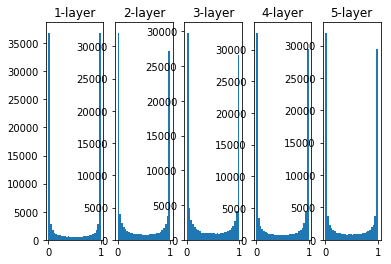

In [6]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

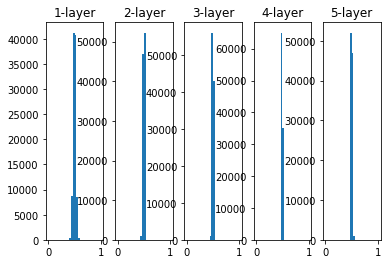

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    w=np.random.randn(node_num, node_num)*0.01 # 가중치의 표준편차 변경
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

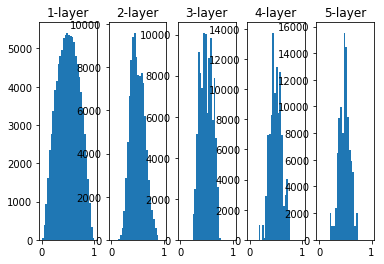

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    node_num=100
    w=np.random.randn(node_num, node_num)/np.sqrt(node_num) # Xavier 초깃값
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

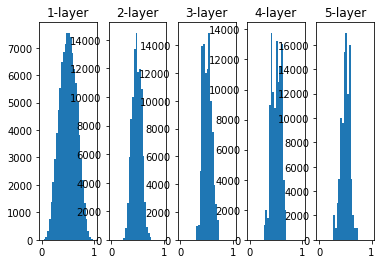

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
    return np.maximum(0,x)

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    node_num=100
    w=np.random.randn(node_num, node_num)/np.sqrt(2*node_num) # Xavier 초깃값
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [12]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test)=load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

In [22]:
from multi_layer_net import MultiLayerNet
from gradient import grads
network=MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer=SGD(lr=0.01)
max_epochs=201
train_size=x_train.shape[0]
batch_size=100

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

iter_per_epoch=max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(1000000000):
    batch_mask=np.random.choice(train_size, batch_size)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt+=1
        if epoch_cnt >= max_epochs:
            break

ImportError: cannot import name 'grads' from 'gradient' (D:\notebooks\gradient.py)

In [19]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask=None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask=np.random.rand(*x.shape)>self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0-self.dropout_ratio)
        
    def backward(self, dout):
        return dout*self.mask

In [29]:
from dataset.mnist import load_mnist
from util import shuffle_dataset
(x_train, t_train), (x_test, t_test)=load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate=0.20
validation_num=int(x_train.shape[0]*validation_rate)

x_val=x_train[:validation_num]
t_val=t_train[:validation_num]
x_train=x_train[validation_num:]
t_train=t_train[validation_num:]

In [30]:
weight_decay=10**np.random.uniform(-8,-4)
lr=10**np.random.uniform(-6,-2)